# Machine Leaning Examples

In [1]:
print ("Hello",end="\n")

Hello


machine learning: machine learns from the data 

data -> algorithm -> creates a model

machine learning types: supervised and unsupervised

supervised - value prediction unsupervised - clusturs are created

esc+ m in jupyter -  for heaadings

#- number of #'s represent the h1, h2 etc
* - emphasis on the line words

esc+y - for code

shift+ tab - for description of methods

workflow:

1.right question 
(need a stmt to direct and validate work -
 which gives the data set we are using and the accuracy we like to obtain and what we are looking for from the data)
-> 2 .data 
(find data , clean it ,explore the data,mold the data )

-> alogrithm -> train on the data -> test on the new data which isn't used in training
(go back and forth int he flow to get accurate results)


more data more accurate the model

In [2]:
for i in range(1,5):
    print(i)

1
2
3
4


In [3]:
x=0
for y in range(1,5):
    x=x+y
    print("y= {0} x={1}".format(y,x))
    


y= 1 x=1
y= 2 x=3
y= 3 x=6
y= 4 x=10


# Pima prediction data

**Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and Review data

In [5]:
df= pd.read_csv("pima-data.csv")

In [6]:
df.shape #no of rows and columns

(768, 10)

In [7]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


**checking for null values in the data**

In [9]:
df.isnull().values.any()  # returns true if any nulls are found

False

In [10]:
df.corr() 

#correlation between the values 1 if there is max correlation. Correlation is 1 between 
#age and thickness. so have to drop one or can just use one at a time


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


# Deleting the skin coloumn 

In [11]:
del df['skin']

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


***checking for more correlations after the deletion ***

In [13]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Molding data

## Checking for data types

In [14]:
diabeties_map = {True : 1, False : 0}

In [15]:
df['diabetes'] = df['diabetes'].map(diabeties_map) #change the type of diabetes

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Check for True or false ratios

In [17]:
true_len= len(df.loc[df['diabetes'] == 1]) 
#loc gives the all the entries with the particular condtion
false_len= len(df.loc[df['diabetes'] == 0])
print("number of true cases {0} and % = {1:5f}%".format(true_len,(true_len / (true_len + false_len))*100 ))
print("number of false cases {0} and % = {1:2.2f}%".format(false_len,(false_len / (true_len + false_len))*100 ))


number of true cases 268 and % = 34.895833%
number of false cases 500 and % = 65.10%


### Standard prediction tecniques can be used cause major portion of data isn't true or false

1. In selecting the Algorithm we check the **leaning type**  
prediction is done in supervised ML
2. **Result Type** : Regression - continuous values 
classification : discrete values
3. **Complexity**    

Data -> **traning** 70% and **Testing* 30%

Test results- features are the axis used
we need to use in number of features to make it wasy to compute

# Scikit Learn Library

Work with numpy scipy and pandas

Split data , data preperation , train with initial algorithm

Importing the train test splitting from scikit

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
!pip install sklearn

In [20]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg','glucose_conc','glucose_conc','thickness','insulin','bmi','diab_pred','age']
predicted_class_name=['diabetes']
x=df[feature_col_names].values
y=df[predicted_class_name].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=split_test_size, random_state=42)
#random state is 

In [23]:
print(len(df.index))
print("train percentage {0:0.2f}".format((len(x_train)/len(df.index))*100))
print("train percentage {0:0.2f}".format((len(x_test)/len(df.index))*100))

768
train percentage 69.92
train percentage 30.08


In [24]:
true_len= len(df.loc[df['diabetes'] == 1]) 
false_len= len(df.loc[df['diabetes'] == 0])
print("number of true cases {0} and % = {1:5f}%".format(true_len,(true_len / (true_len + false_len))*100 ))
print("number of false cases {0} and % = {1:2.2f}%".format(false_len,(false_len / (true_len + false_len))*100 ))

true_len= len(x_test[x_test[:] == 1]) 
false_len= len(x_test[x_test[:] == 0])

print("test case number of true cases {0} and % = {1:5f}%".format(true_len,(true_len / (true_len + false_len))*100 ))
print("number of false cases {0} and % = {1:2.2f}%".format(false_len,(false_len / (true_len + false_len))*100 ))

true_len= len(x_train[x_train[:] == 1]) 
false_len= len(x_train[x_train[:] == 0])

print("train case number of true cases {0} and % = {1:5f}%".format(true_len,(true_len / (true_len + false_len))*100 ))
print("number of false cases {0} and % = {1:2.2f}%".format(false_len,(false_len / (true_len + false_len))*100 ))


number of true cases 268 and % = 34.895833%
number of false cases 500 and % = 65.10%
test case number of true cases 29 and % = 11.328125%
number of false cases 227 and % = 88.67%
train case number of true cases 106 and % = 17.320261%
number of false cases 506 and % = 82.68%


# ':' reads everything - slicing 

## Missing values need to be identified 

### have to check for 0 value and have to see if it is valid or not. And that helps if we have domain knowledge

ignore or delete or replace with other values - **imputing options**

**Imputing options:**  replace with mean median
replace with expert researcher values
 

# Impute with mean

In [25]:
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
print(len(df.loc[df['num_preg']==0]))

111


In [26]:
from sklearn.impute import SimpleImputer
fill_0 =SimpleImputer(missing_values=0,strategy="mean")
x_train= fill_0.fit_transform(x_train)
x_test= fill_0.fit_transform(x_test)

**The zeros are not been imputed and now we hae to train the data**

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_model =GaussianNB()
nb_model.fit(x_train,y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

**A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().**

# Training the model

In [28]:
from sklearn import metrics
nb_predict_train= nb_model.predict(x_train)
print("the accuracy of the model is : {0:0.2f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

the accuracy of the model is : 0.78


In [31]:
nb_predict_test= nb_model.predict(x_test)
print("the accuracy of the model is : {0:0.2f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

the accuracy of the model is : 0.76


In [32]:
print("confusion matrix : {0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))

confusion matrix : [[128  23]
 [ 33  47]]


columns - predicted values col1-predicted false  col2 -pred true
rows - actual values row 1-actual false  row2 - actual true
**Classification Report:**

In [33]:
print("classification report : {0}".format(metrics.classification_report(y_test,nb_predict_test)))

classification report :               precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.67      0.59      0.63        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231



**Recall - >how much the model is predicting correctly and how much of that is true tp/tp+fn
precision ->how much the model is predicting true and how much of that is correct tp/tp+fp**

# Improvement options
asjust algorithm
get more data or improve data
improve training 
switch algorithm
# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.ravel())

E:\AnacondaPython\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
rf_predict_test = rf_model.predict(x_test)
print("test set accuracy = {0:0.4f}".format(metrics.accuracy_score(rf_predict_test,y_test)))

test set accuracy = 0.7143


In [36]:
rf_predict_train = rf_model.predict(x_train)
print("train set accuracy = {0:0.4f}".format(metrics.accuracy_score(rf_predict_train,y_train)))

train set accuracy = 0.9907


# Fixing over fitting 

    algorithms have special tuning parameters - hyper parameters - 
    
    1. regularization  hyperparameter
    2. cross validation
   both can be used on an algorithm 
# Logistics regression algorithm
changing the algorithm and if it over fits we can change its hyper parameter

In [37]:
from sklearn.linear_model import LogisticRegression
nb_model =LogisticRegression(C=0.7,random_state=42)
#c is regularization hyper parameter
nb_model.fit(x_train,y_train.ravel())
nb_predict_train= nb_model.predict(x_train)
print("the accuracy of the model is : {0:0.2f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
nb_predict_test= nb_model.predict(x_test)
print("the accuracy of the model is : {0:0.2f}".format(metrics.accuracy_score(y_test,nb_predict_test)))
print("classification report : {0}".format(metrics.classification_report(y_test,nb_predict_test)))

E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


the accuracy of the model is : 0.77
the accuracy of the model is : 0.75
classification report :               precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.68      0.55      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



Still the recall value is low so we are creating a loop which gives highest regularization hyper parameter value

In [38]:
c_start = 0.1
c_end=5
c_incr=0.1
c_values,recall_values=[],[]
c_val=c_start
best_recall_score=0
while(c_val<c_end):
    c_values.append(c_val)
    lr_model_loop=LogisticRegression(C=c_val,random_state=42)
    lr_model_loop.fit(x_train,y_train.ravel())
    lr_predict_test_loop=lr_model_loop.predict(x_test)
    recall_score=metrics.recall_score(y_test,lr_predict_test_loop)
    recall_values.append(recall_score)
    if(recall_score>best_recall_score):
        best_recall_score=recall_score
        best_lr_predict_loop_test=lr_predict_test_loop
    best_score_c_val= c_values[recall_values.index(best_recall_score)]
    c_val=c_val+c_incr    

E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\An

E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\An

In [ ]:
print("best recall score = {0} and regularization value={1}".format(best_recall_score,best_score_c_val))   

Text(0, 0.5, 'recall_values')

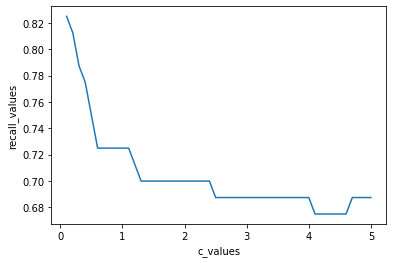

In [40]:
%matplotlib inline
plt.plot(c_values,recall_values,"-")
plt.xlabel("c_values")
plt.ylabel("recall_values")

Still we are not able to reach 70 % of recall rate cause the data imbalance (number of false in data is more than number of true)

In [39]:
c_start = 0.1
c_end=5
c_incr=0.1
c_values,recall_values=[],[]
c_val=c_start
best_recall_score=0
while(c_val<c_end):
    c_values.append(c_val)
    lr_model_loop=LogisticRegression(C=c_val,class_weight="balanced",random_state=42)
    lr_model_loop.fit(x_train,y_train.ravel())
    lr_predict_test_loop=lr_model_loop.predict(x_test)
    recall_score=metrics.recall_score(y_test,lr_predict_test_loop)
    recall_values.append(recall_score)
    if(recall_score>best_recall_score):
        best_recall_score=recall_score
        best_lr_predict_loop_test=lr_predict_test_loop
    best_score_c_val= c_values[recall_values.index(best_recall_score)]
    c_val=c_val+c_incr

E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AnacondaPython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\An

In [41]:
print("best recall score = {0} and regularization value={1}".format(best_recall_score,best_score_c_val))   

best recall score = 0.825 and regularization value=0.1


**added class weight to balanced**
# cross validation  

We need data to tune the hyper parameters that is why we split our data into training validation testing or we can do cross validation (k fold)

Split the training data into k folds and select one of them as validation data every time 

for each fold we determine the best hyper parameter value and then average the value 

# Logistic regression CV

In [42]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model=LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=False,class_weight="balanced") 
# cv- number of folds cs=3- integer means it will check that many values for each fold to get the best value
lr_cv_model.fit(x_test,y_test.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [44]:
lr_cv_model_predict=lr_cv_model.predict(x_test)
recall_score=metrics.recall_score(y_test,lr_cv_model_predict)
print(recall_score)
print(metrics.classification_report(y_test,lr_cv_model_predict))

0.75
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       151
           1       0.62      0.75      0.68        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231



R langugae can be used instead of python and UCI ml repository - contains data sets